In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='resume_score', ylabel='cgpa'>

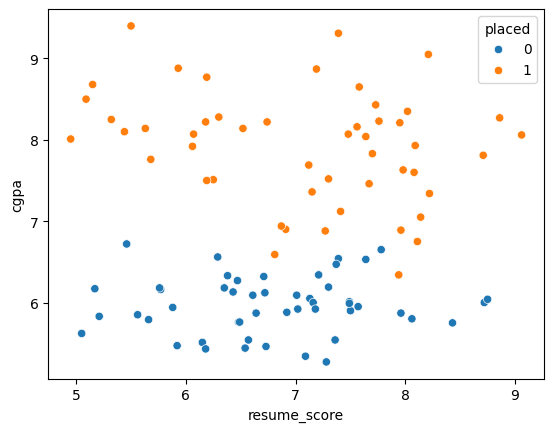

In [4]:
#plot of resume_score and cgpa in seaborn as scatter plot
sns.scatterplot(x="resume_score", y="cgpa", data=df,hue='placed')

In [5]:
X = df.iloc[: , 0:2]
y = df.iloc[: , -1]

In [6]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [7]:

p.fit(X,y)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,0


In [8]:
p.coef_

array([[ 40.26, -36.  ]])

In [9]:
p.intercept_

array([-25.])

In [10]:
from mlxtend.plotting import plot_decision_regions

/Users/ankitpokhrel/Downloads/All projects/ML_Projects/campusx/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

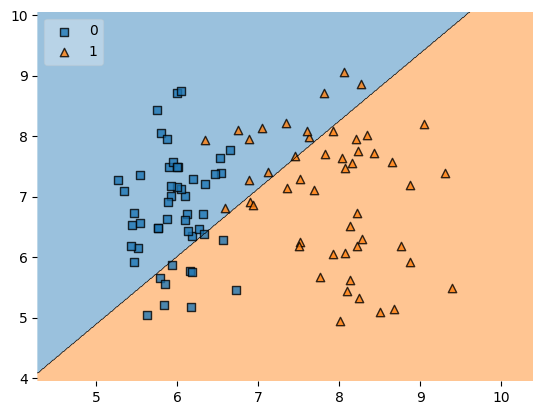

In [11]:
plot_decision_regions(X.values, y.values, clf=p, legend=2)

In [12]:
#Math behind perceptron
df = sns.load_dataset("iris")

In [13]:
test = df[(df['species'] == 'setosa') | (df['species'] == 'versicolor')]

In [14]:
test['species'] = test['species'].map({'setosa': 0, 'versicolor': 1})

/var/folders/4j/n0rl6b3s0657t_7z21qxxz6w0000gn/T/ipykernel_56684/1601871542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['species'] = test['species'].map({'setosa': 0, 'versicolor': 1})


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

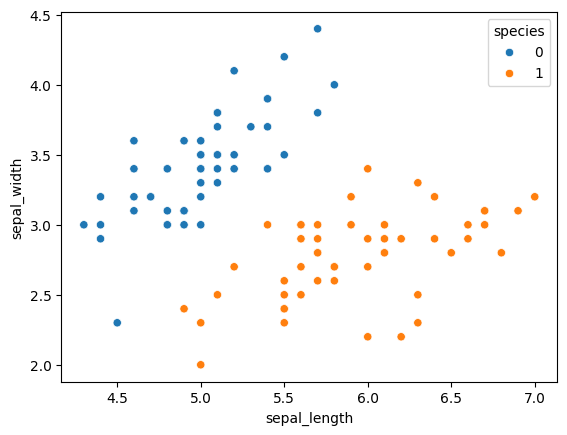

In [15]:
sns.scatterplot(x="sepal_length", y="sepal_width", data=test, hue='species')

In [16]:
test = test[['sepal_length', 'sepal_width','species']]

In [17]:
X = test.iloc[: , 0:2]
y = test.iloc[: , -1]

In [18]:
#X and y in numpy array
X = X.to_numpy()
y = y.to_numpy()

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [75]:

def step(z):
    return 1 if z>0 else 0

In [76]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(20000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]

In [77]:
intercept_,coef_ = perceptron(X,y)

In [78]:
print(coef_)
print(intercept_)

[ 5.52 -7.91]
-4.699999999999999


In [79]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [80]:
x_input = np.linspace(4,7,100)
y_input = m*x_input + b

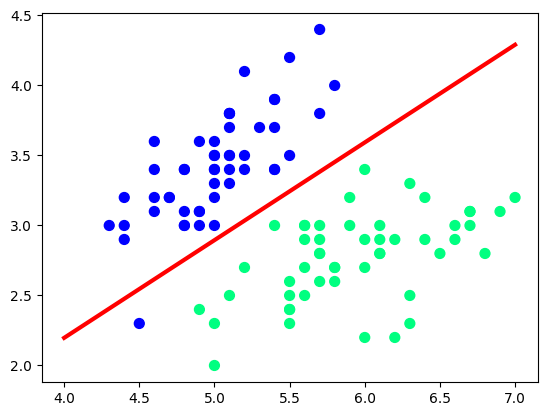

In [81]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')
plt.plot(x_input,y_input,color='red',linewidth=3)